# TIA - Taller 2: Filtros

#### Integrantes:
- Daniel Felipe Segura Rincon
- Andres Felipe Zuleta Romero
- Juan Andres Barrera Rodriguez

In [1]:
import cv2
from PIL import Image
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
bicicleta = cv2.imread('Imagenes/Bicicleta.jpg')
bus = cv2.imread('Imagenes/Bus.jpg')
carro = cv2.imread('Imagenes/Carro.jpg')
pare = cv2.imread("Imagenes/Pare.jpg")
planta = cv2.imread('Imagenes/Planta.jpg')

#### Procedimiento:
Para aplicar los filtros primero se aplicaron los kernel en las 8 direcciones de manera individual y se aplicaron a las imágenes usando 3 estrategias distintas:
- Suma de las imágenes.
- Suma de las matrices kernel.
- Método de máximos.

Sumado a esto, se compararon los resultados con la aplicación de los filtros Canny y Laplaciano.



In [3]:
N_kernel = np.array([[-1, -1, -1],[1, -2, 1],[1, 1, 1]])
S_kernel = np.array([[1,1,1],[1,-2,1],[-1,-1,-1]])
E_kernel = np.array([[1,1,-1],[1,-2,-1],[1,1,-1]])
O_kernel = np.array([[-1,1,1],[-1,-2,1],[-1,1,1]])
So_kernel = np.array([[1,1,1],[-1,-2,1],[-1,-1,1]])
No_kernel = np.array([[-1,-1,1],[-1,-2,1],[1,1,1]])
Se_kernel = np.array([[1,1,1],[1,-2,-1],[1,-1,-1]])
Ne_kernel = np.array([[1,-1,-1],[1,-2,-1],[1,1,1]])
Suma_kernel = N_kernel + S_kernel + E_kernel + O_kernel + So_kernel + No_kernel + Se_kernel + Ne_kernel

In [23]:
def Filtros(image):
    plt.figure(1)
    #Aplicación de los 8 kernel
    plt.subplots_adjust(top=1.75,bottom=0.3,left=0.10,right=2,hspace=0.25,wspace=0.5)
    plt.subplot(331),plt.imshow(image)
    plt.title('Original'), plt.xticks([]), plt.yticks([])

    imagen_Ne = cv2.filter2D(src=image,ddepth=-1,kernel=Ne_kernel)
    plt.subplot(332),plt.imshow(imagen_Ne)
    plt.title('NE'), plt.xticks([]), plt.yticks([])

    imagen_N = cv2.filter2D(src=image,ddepth=-1,kernel=N_kernel)
    plt.subplot(333),plt.imshow(imagen_N)
    plt.title('N'), plt.xticks([]), plt.yticks([])

    imagen_se = cv2.filter2D(src=image,ddepth=-1,kernel=Se_kernel)
    plt.subplot(334),plt.imshow(imagen_se)
    plt.title('SE'), plt.xticks([]), plt.yticks([])

    imagen_So = cv2.filter2D(src=image,ddepth=-1,kernel=So_kernel)
    plt.subplot(335),plt.imshow(imagen_So)
    plt.title('SO'), plt.xticks([]), plt.yticks([])

    imagen_S = cv2.filter2D(src=image,ddepth=-1,kernel=S_kernel)
    plt.subplot(336),plt.imshow(imagen_S)    
    plt.title('S'), plt.xticks([]), plt.yticks([])

    imagen_No = cv2.filter2D(src=image,ddepth=-1,kernel=No_kernel)
    plt.subplot(337),plt.imshow(imagen_No)
    plt.title('NO'), plt.xticks([]), plt.yticks([])

    imagen_O = cv2.filter2D(src=image,ddepth=-1,kernel=O_kernel)
    plt.subplot(338),plt.imshow(imagen_O)
    plt.title('O'), plt.xticks([]), plt.yticks([])

    imagen_E = cv2.filter2D(src=image,ddepth=-1,kernel=E_kernel)
    plt.subplot(339),plt.imshow(imagen_E)
    plt.title('E'), plt.xticks([]), plt.yticks([])


    plt.figure(2)
    #Suma de las matices
    plt.subplots_adjust(top=1.75,bottom=0.3,left=0.10,right=2,hspace=0.25,wspace=0.5)
    imagen_suma = cv2.filter2D(src=image,ddepth=-1,kernel=Suma_kernel)
    plt.subplot(331),plt.imshow(imagen_suma)
    plt.title('Suma de Matrices'), plt.xticks([]), plt.yticks([])
    #Suma de las imágenes
    plt.subplots_adjust(top=1.75,bottom=0.3,left=0.10,right=2,hspace=0.25,wspace=0.5)
    suma_imagen=imagen_Ne+imagen_N+imagen_se+imagen_So+imagen_S+imagen_No+imagen_O+imagen_E
    plt.subplot(332),plt.imshow(suma_imagen)
    plt.title('Suma de Imágenes'), plt.xticks([]), plt.yticks([])
    #Máximos
    h, w = image.shape[:2]  # Obtenemos las dimensiones de la imagen
        # Creamos una matriz para almacenar la imagen resultante con los valores máximos
    image_max = np.zeros((h, w), dtype=np.uint8)
        # Lista de imágenes
    images = [imagen_N, imagen_S, imagen_E, imagen_O, imagen_Ne, imagen_No, imagen_So, imagen_se]
        # Convertimos la lista de imágenes en un array de NumPy
    images_array = np.array(images)
        # Usamos np.maximum.reduce() para encontrar el máximo en cada posición
    image_max = np.maximum.reduce(images_array)
    plt.subplot(333),plt.imshow(image_max,cmap="gray")        
    plt.title('Máximos'), plt.xticks([]), plt.yticks([])
    #Mínimos
    image_min = np.minimum.reduce(images_array)
    plt.subplot(334),plt.imshow(image_min,cmap="gray")        
    plt.title('Mínimos'), plt.xticks([]), plt.yticks([])
    #Canny
    imagen_canny = cv2.Canny(image,75,255)
    plt.subplot(335),plt.imshow(imagen_canny,cmap = 'gray')
    plt.title('Filtro Canny'), plt.xticks([]), plt.yticks([])
    #Laplaciano
    imagen_lap = cv2.Laplacian(image,-1,10)
    plt.subplot(336),plt.imshow(imagen_lap,cmap = 'gray')
    plt.title('Filtro Lalplaciano'), plt.xticks([]), plt.yticks([])
    # Blur 
    imagen_blur = cv2.blur(image,(3,3))
    plt.subplot(337),plt.imshow(imagen_blur,cmap = 'gray')
    plt.title('Filtro blur'), plt.xticks([]), plt.yticks([])
    # Bilateral
    imagen_Bilateral = cv2.bilateralFilter(image,5,0.1,0.9)
    plt.subplot(338),plt.imshow(imagen_Bilateral,cmap = 'gray')
    plt.title('Filtro Bilateral'), plt.xticks([]), plt.yticks([])

##### Primera Imagen: Bus

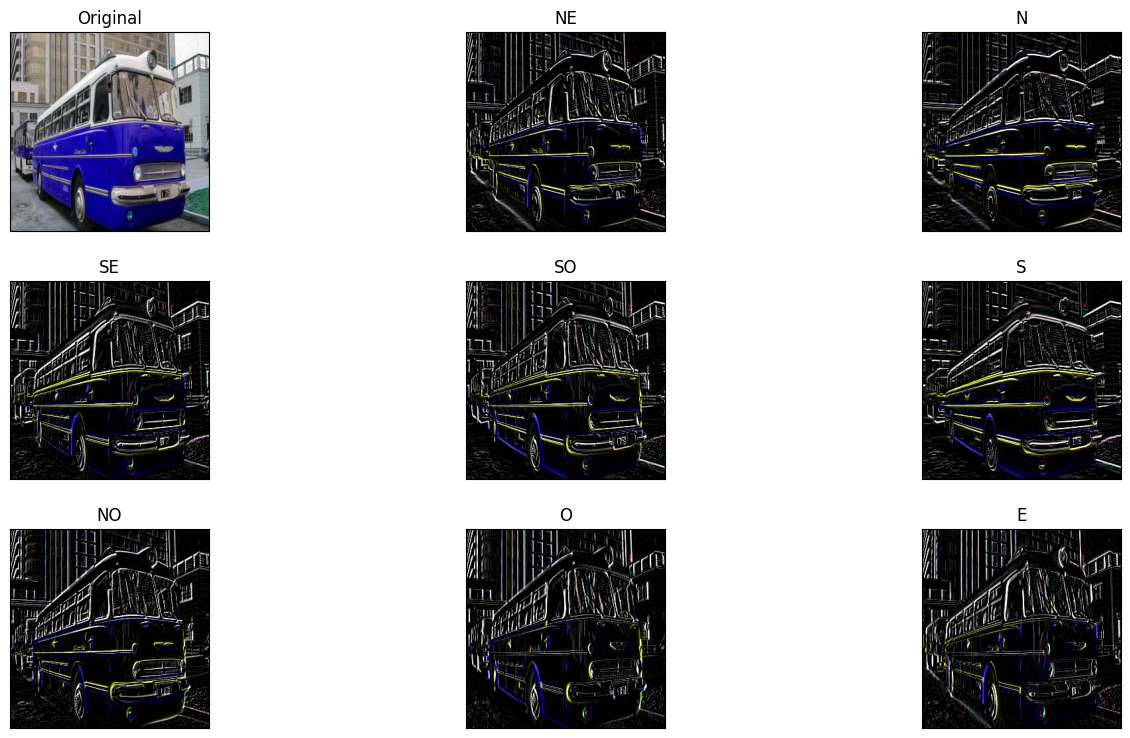

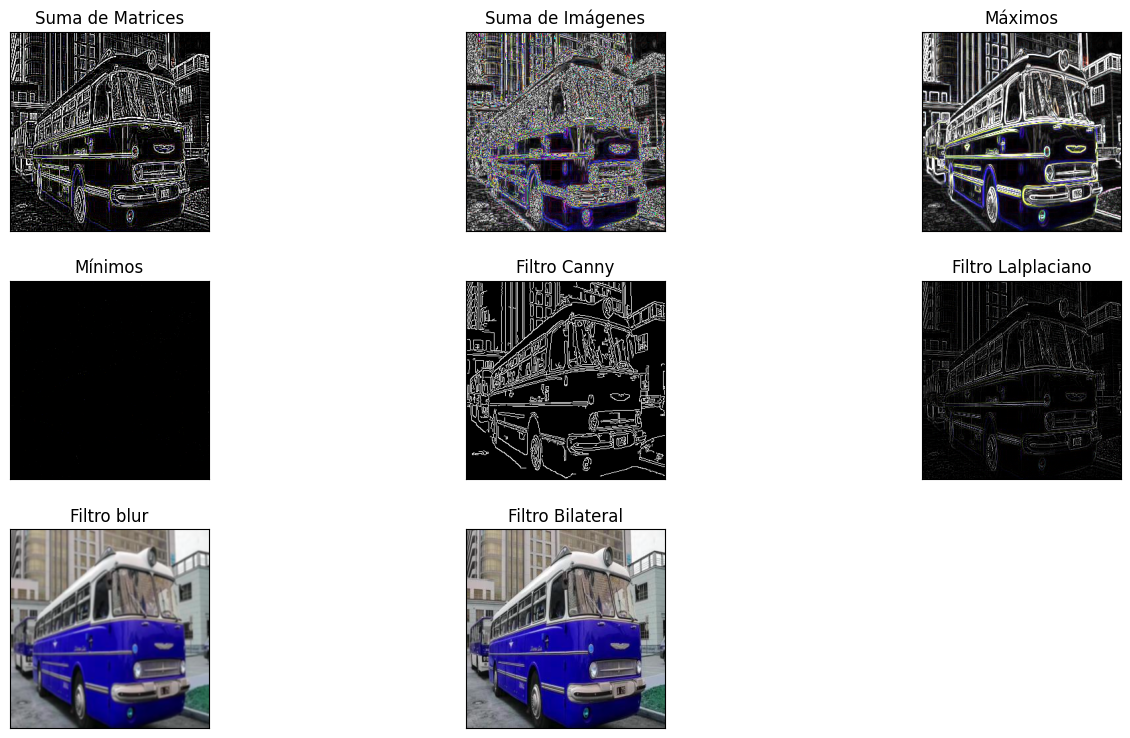

In [24]:
Filtros(bus)

##### Segunda Imagen: Carro

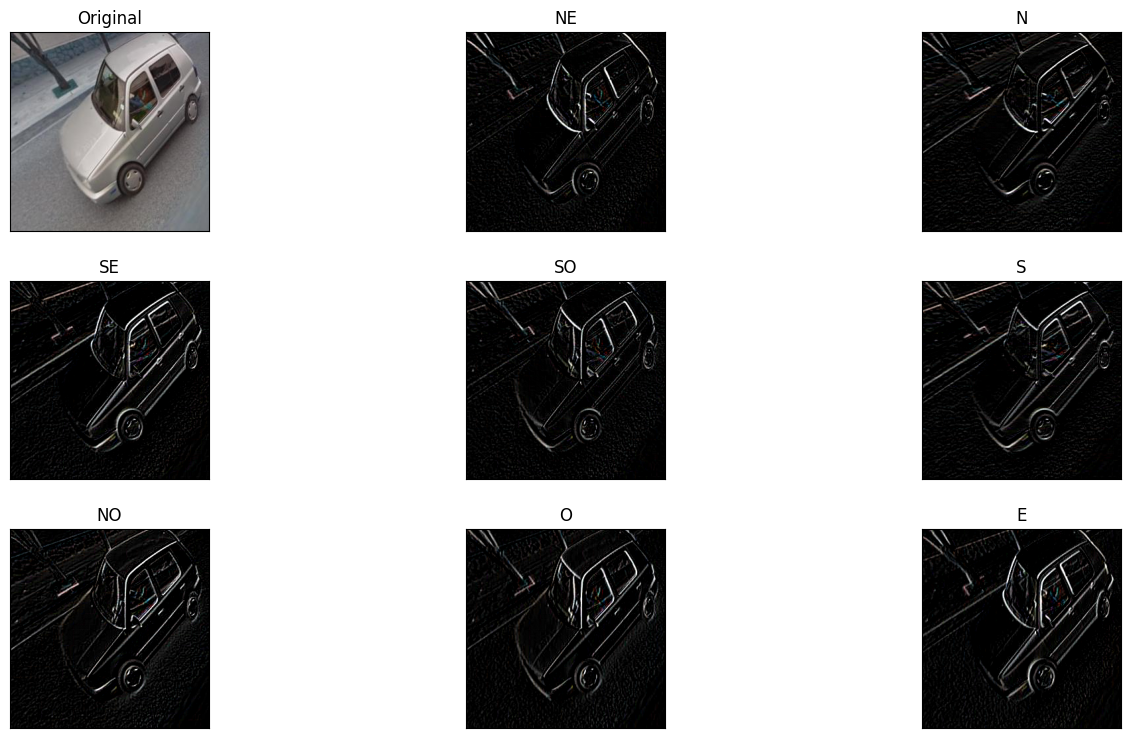

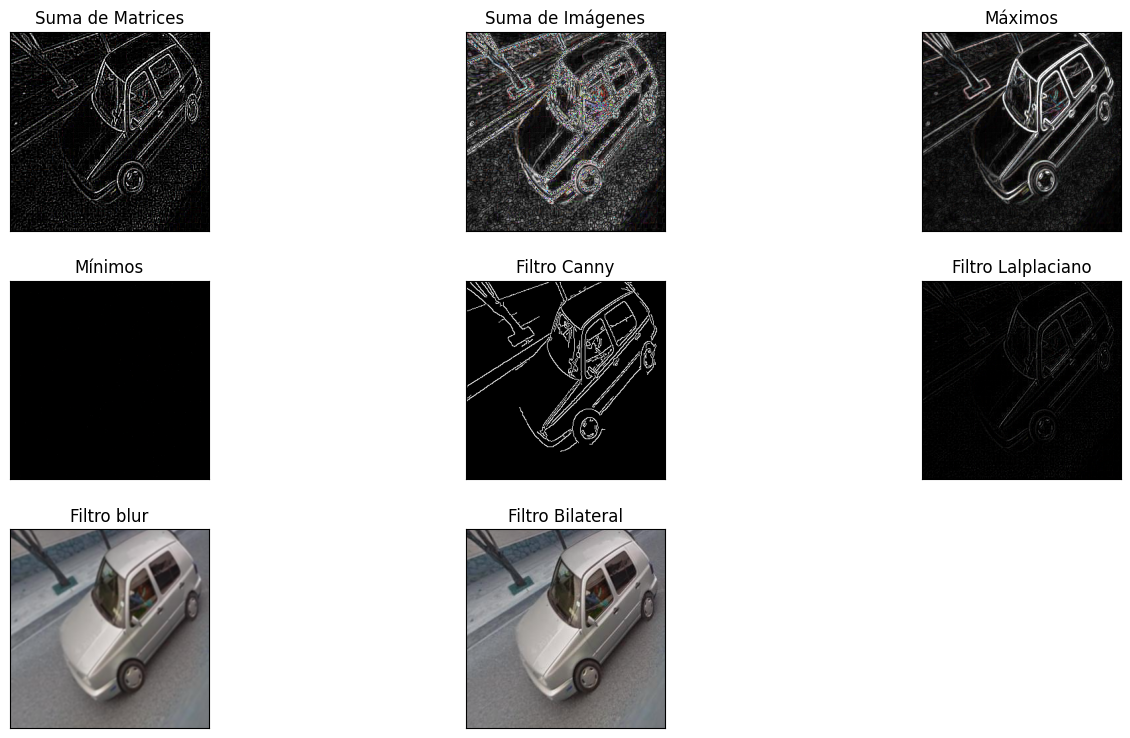

In [28]:
Filtros(carro)

#### Tercera Imagen: Bicicleta

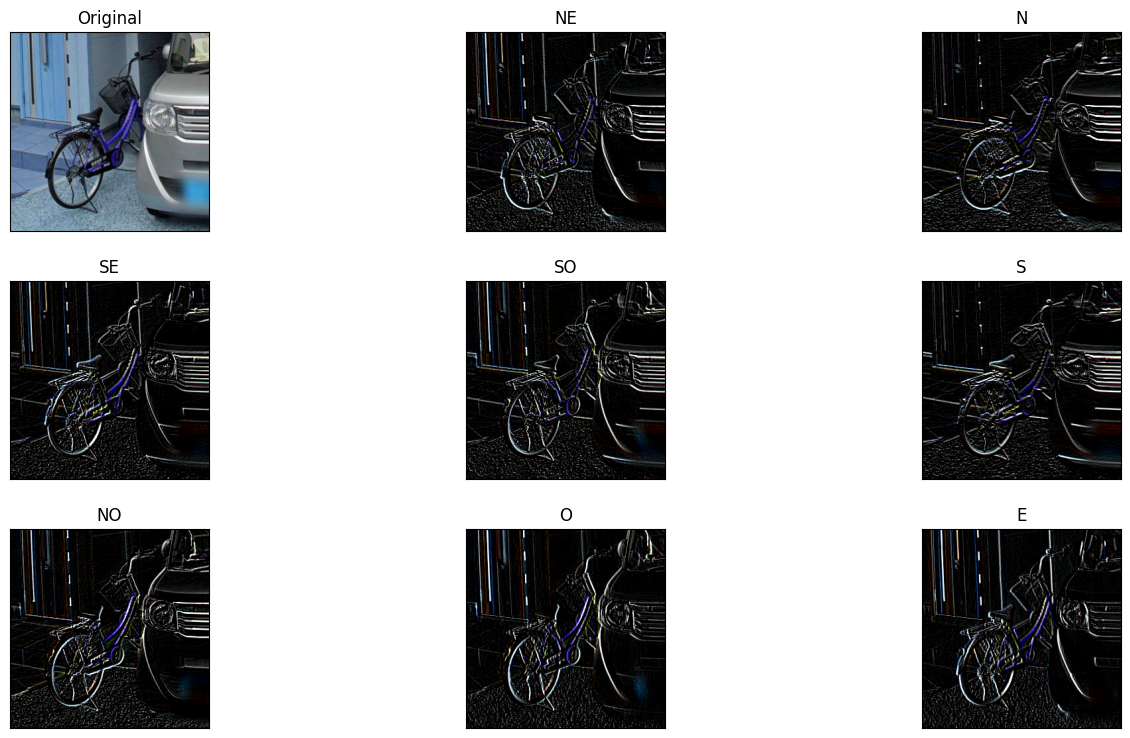

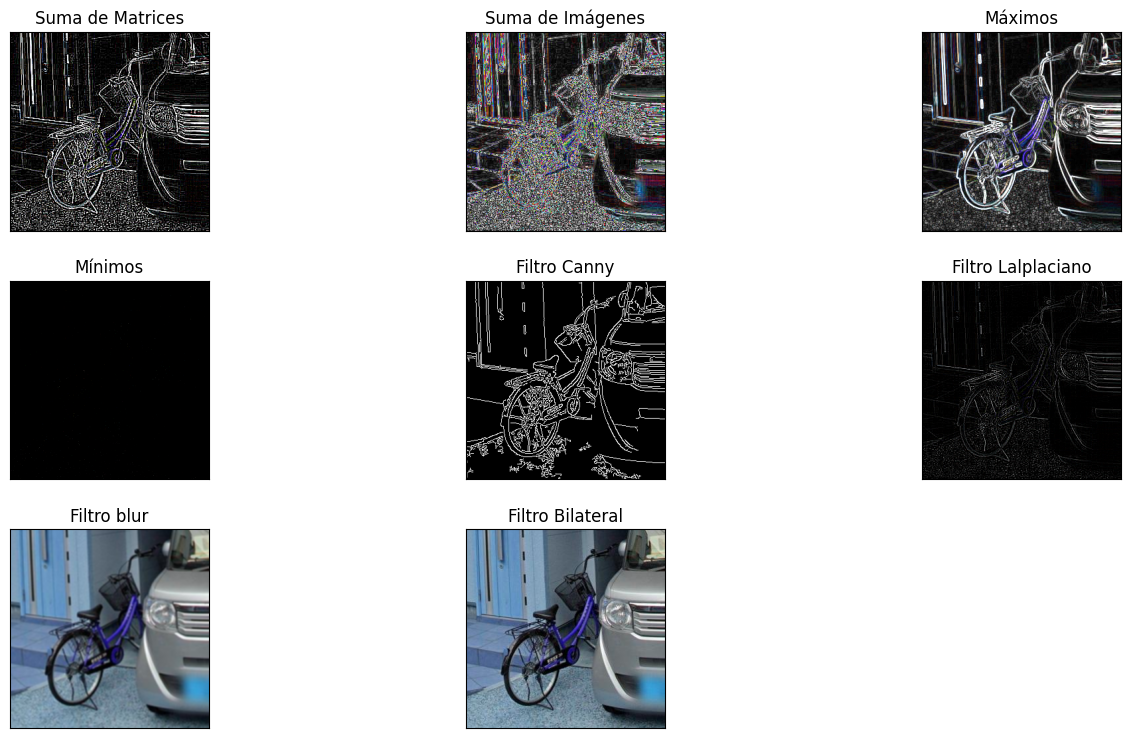

In [27]:
Filtros(bicicleta)

#### Cuarta Imagen: Cruce Vial

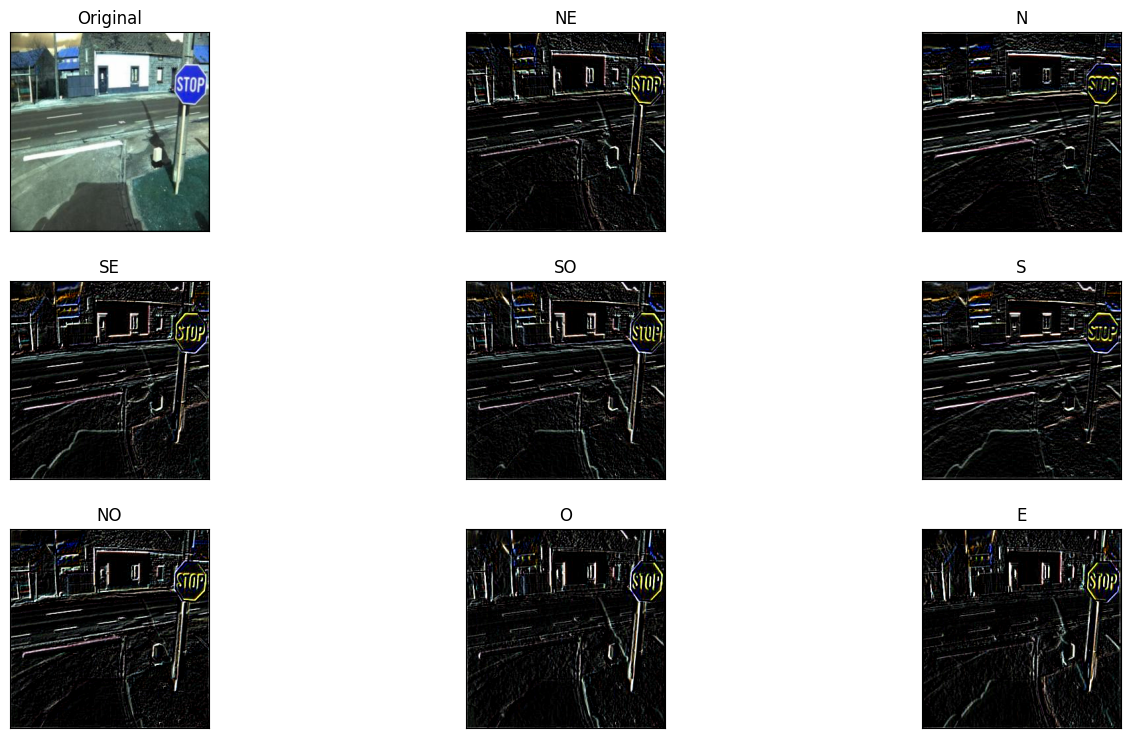

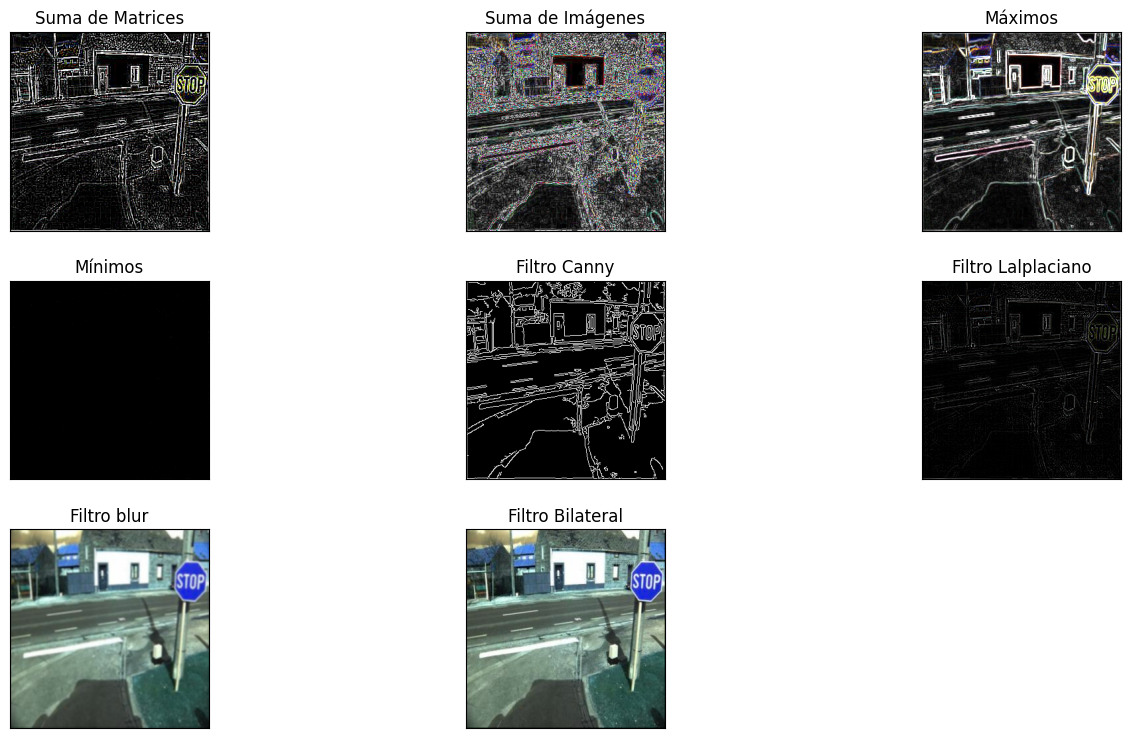

In [26]:
Filtros(pare)

#### Quinta Imagen: Planta

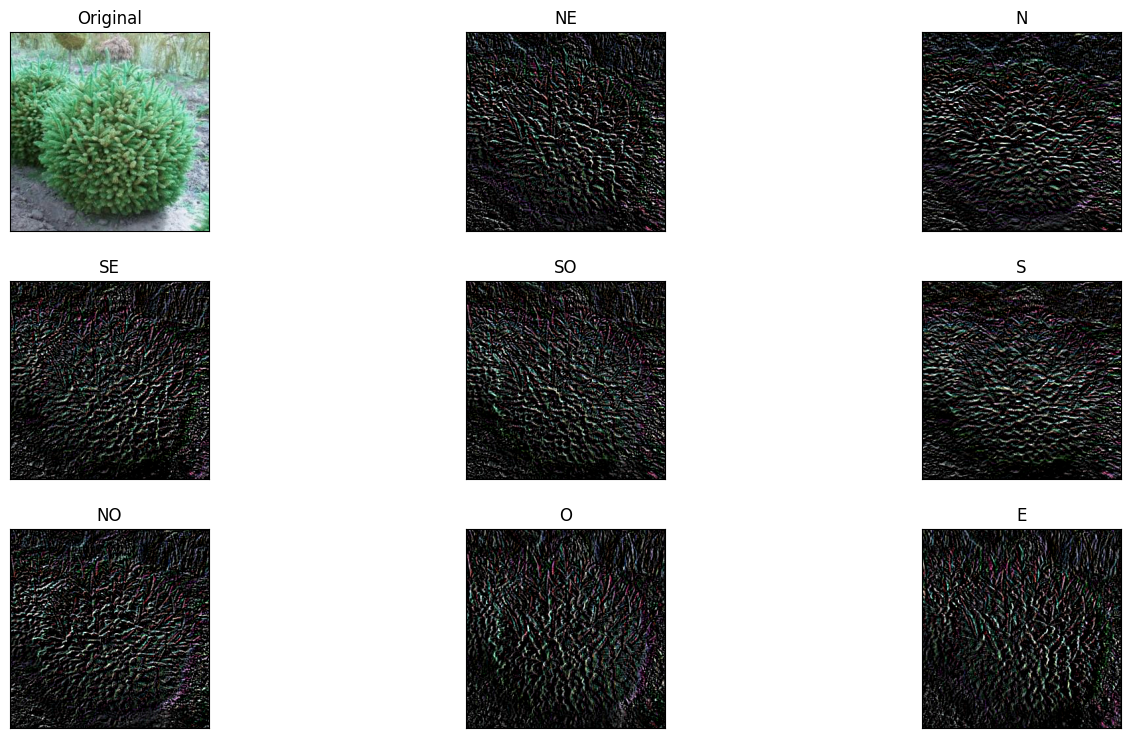

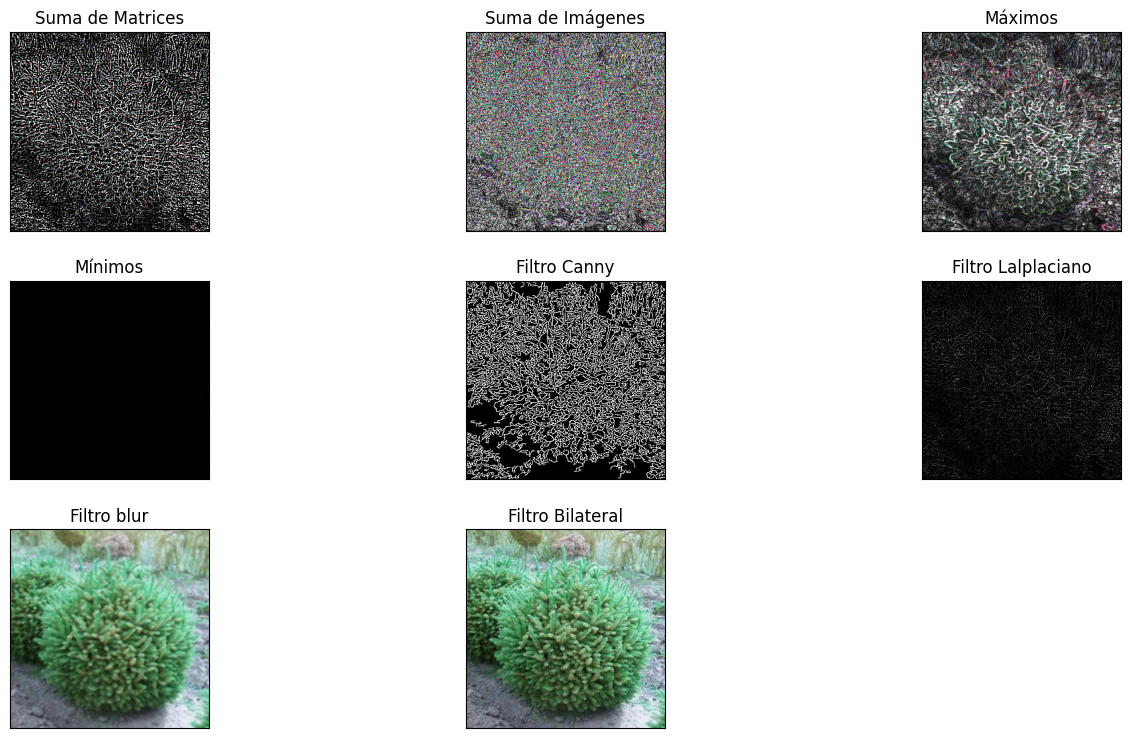

In [25]:
Filtros(planta)

### Analisis

- Los filtros de suavizado a simple vista no parecen ser muy utiles para el analisis de imagen ya que este tipo de filtros difuminan los bordes de los objetos lo que podria generar perdidas de informacion de la imagen.
- Al usar el filtro Prewitt sumando sus 8 direcciones, se obtiene una imagen de los bordes de los objetos con mucha informacion lo que puede ser muy util a la hora de la identificacion de objetos. Igualmente usando el filtro de maximos se obtiene un resultado muy similar al que se obtiene con el filtro Prewitt.
- Los filtros Laplacianos y Canny dan una buena aproximacion de los bordes de los objetos. Sin embargo, no son tan detallados como los filtros mencionados anteriormente.
- El filtro de minimos es inutil ya que el resultado sera siempre una imagen completamente negra.